# 【自動控制】 單元二-控制系統的數學模型(I)：拉氏轉換

- 葉明豐 Ming-Feng Yeh

## 1. 使用 SymPy 作 Laplace Transform

參考資料：
- [Len Hou - Medium](https://medium.com/@chien.lun.hou) / [【控制系統1-1】利用SymPy作拉氏轉換代數運算](https://reurl.cc/Mvv9av)
- [SymPy 1.5.1 documentation](https://docs.sympy.org/latest/index.html) / [Integrals](https://docs.sympy.org/latest/modules/integrals/integrals.html)

## Laplace Transform 拉氏轉換
Compute the Laplace Transform *F(s)* of *f(t)*: $\mathscr{L}\{f(t)\} = F(s)$

語法： **laplace_transform(f, t, s)**

回傳值(return)： (F, a, cond)

- *F* is the Laplace transform of *f*,
- *operatorname{Re}(s) > a* is the half-plane of convergence, 收斂區域
- *cond* are auxiliary convergence conditions. 輔助收斂條件

從 SymPy 的 sympy.integrals 模組匯入 laplace_transform 方法

In [1]:
from sympy.integrals import laplace_transform

從 SymPy 匯入基本代數函數：
- **exp** 代表以常數 *e* 為底數的自然對數，
- **sin** 表示正弦函數，**cos** 表示餘弦函數，
- **DiracDelta** 代表單位脈衝函數，
- **Heaviside** 代表單位步階函數。

In [2]:
from sympy import exp, sin, cos, DiracDelta, Heaviside

從 sympy.abc 模組匯入函數的代數(即會使用到的變數)

In [3]:
from sympy.abc import t, s, a, w

讓方程式可以「正常化」顯示： **x^2 + 2*x + 3** 轉換成 $x^2 + 2x + 3$

In [4]:
from sympy import init_printing
init_printing(use_unicode=True)

### 【例】計算 $sin(wt)$ 的拉氏轉換，即求 $\mathscr{L}\{\sin(wt)\} = ?$

In [5]:
laplace_transform(sin(w*t), t, s)

不顯示收斂區域的語法： laplace_transform(f, t, s)[0]

In [6]:
laplace_transform(sin(w*t), t, s)[0]

---

## Inverse Laplace Transform 反拉氏轉換
Compute the inverse Laplace Transform *f(t)* of *F(s)*: $\mathscr{L}^{-1}\{F(s)\} = f(t)$

語法： **inverse_laplace_transform(F, s, t)**

回傳值： f

從 SymPy 的 sympy.integrals.transforms 模組匯入 inverse_laplace_transform 方法

In [7]:
from sympy.integrals.transforms import inverse_laplace_transform

### 【例】計算 $\frac{2}{s+1}$ 的反拉氏轉換，即求 $\mathscr{L}^{-1}\{\frac{2}{s+1}\} = ?$

In [8]:
inverse_laplace_transform(2/(s+1), s, t)

### 【例】求 $\mathscr{L}^{-1}\{\frac{1}{s^2+5^2}\} = ?$

In [9]:
inverse_laplace_transform(1/(s**2+5**2), s, t)

### 【例】求 $\mathscr{L}^{-1}\{\frac{w}{s^2+w^2}\} = ?$ 

In [10]:
inverse_laplace_transform(w/(s**2+w**2), s, t)

自行驗證是否成立? $ -\frac{1}{2}i[ie^{2jwt}sin(wt) - e^{2jwt}cos(wt) + isin(wt) + cos(wt)]e^{jwt} = sin(wt) $ 

***

## 2. 利用 SymPy 作部分分式運算

參考資料：
- [Len Hou - Medium](https://medium.com/@chien.lun.hou) / [【控制系統1–2】利用SymPy作部分分式運算](https://reurl.cc/NjjdQe)
- [SymPy 1.5.1 documentation](https://docs.sympy.org/latest/index.html) / [Simplification](https://docs.sympy.org/latest/tutorial/simplification.html)

**apart()** performs a partial fraction decomposition on a rational function

語法：**apart(expr)**
- expr: expression of a rational function

從 SymPy 匯入所有方法

In [11]:
from sympy import *

除了用**「從 sympy.abc 模組匯入函數的代數」**方式外，也可用 **x, y, z = symbols('x y z')** 的方式來匯入所需代數 。

In [12]:
x, y, z = symbols('x y z')

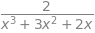

In [13]:
expr = 2/(x**3 + 3*x**2 + 2*x)
expr

In [14]:
apart(expr)

### 【例：僅有單階極點】$G(s) = \frac{2}{s(s+1)(s+2)}$ ，求 $g(t) = \mathscr{L}^{-1}\{G(s)\} = ?$

In [15]:
G1 = 2/(s*(s+1)*(s+2))
G1_apart = apart(G1)
G1_apart

In [16]:
inverse_laplace_transform(1/(s+2)-2/(s+1)+1/s, s, t)

In [17]:
inverse_laplace_transform(G1_apart, s, t)

In [18]:
inverse_laplace_transform(G1, s, t)

### 【例：有多階極點】$G(s) = \frac{s^2+2s+3}{(s+1)^3}$ ，求 $g(t) = \mathscr{L}^{-1}\{G(s)\} = ?$

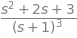

In [19]:
G2 = (s**2+2*s+3)/(s+1)**3
G2

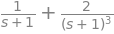

In [20]:
G2_apart = apart(G2)
G2_apart

In [21]:
inverse_laplace_transform(G2_apart, s, t)

### 【例2-2：共軛複數根】$G(s) = \frac{2s+12}{s^2+2s+5}$ ，求 $g(t) = \mathscr{L}^{-1}\{G(s)\} = ?$

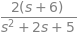

In [22]:
G3 = (2*s+12)/(s**2+2*s+5)
G3_apart = apart(G3)
G3_apart

In [23]:
inverse_laplace_transform(G3_apart, s, t)

## 練習題：求【例2-3】的部分分數展開

### 【例2-3】$ \frac{B(s)}{A(s)} = \frac{2s^3+5s^2+3s+6}{s^3+6s^2+11s+6}$ 

## 極點的影響

In [24]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0, 10, 0.1)

### 【極點均在左半平面】$\mathscr{L}^{-1}\{\frac{1}{(s+1)(s+2)}\} = e^{-t}-e^{-2t}$

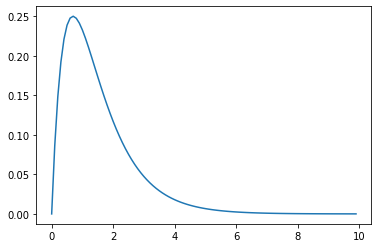

In [25]:
y1 = np.exp(-x) - np.exp(-2*x)
plt.plot(x,y1)

### 【有落在虛軸上的極點】$\mathscr{L}^{-1}\{\frac{2}{s(s+2)}\} = 1-e^{-2t}$

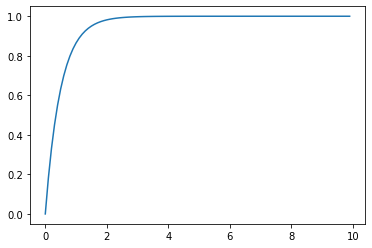

In [26]:
y2 = 1 - np.exp(-2*x)
plt.plot(x,y2)

### 【有落在右半平面的極點】$\mathscr{L}^{-1}\{\frac{3}{(s-1)(s+2)}\} = e^{t}-e^{-2t}$

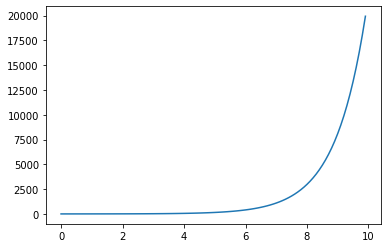

In [27]:
y3 = np.exp(x) - np.exp(-2*x)
plt.plot(x,y3)

### 【共軛複數根】$\mathscr{L}^{-1}\{\frac{2s+12}{s^2+2s+5}\} = 5sin(2t)+2cos(2t)$

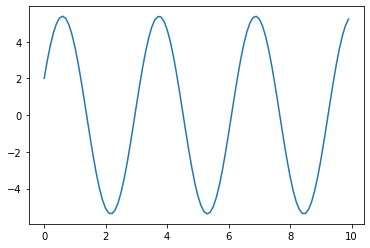

In [28]:
y4 = 5*np.sin(2*x) + 2*np.cos(2*x)
plt.plot(x,y4)

In [29]:
apart(1/((s**2+5*s+6)))

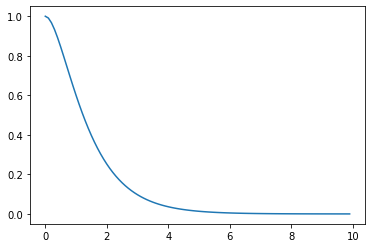

In [30]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0, 10, 0.1)
y = ( 2*np.exp(x) - 1) * np.exp(-2*x)
plt.plot(x,y)
plt.show()

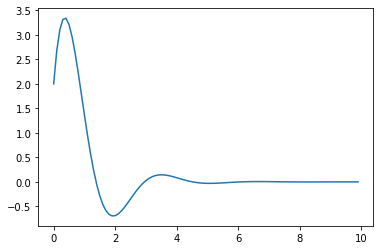

In [31]:
y5 = (5*np.sin(2*x) + 2*np.cos(2*x))*np.exp(-x)
plt.plot(x,y5)